# Import libraries

In [1]:
import os
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from scipy.signal import savgol_filter

from sklearn.preprocessing import MinMaxScaler

In [2]:
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

In [3]:
path_to_save_data = './../data/preprocessed_data'
path_to_save = './../results/01_visualization'

# Loading data

## Spectral data in range *1900-800*

In [4]:
path_to_ftir = './../data/files/train_and_test'

In [5]:
# getting filenames in folder
files = os.listdir(path_to_ftir)

# deleting useless files
for file in files[:]:
    id = file.split('.')[0]
    if not id.isdigit():
        files.remove(file)

# sorting filenames by ascending
files = sorted(files, key=lambda x: int(x.split('.')[0]))

# collectins paths to files, reading files and collecting to dataframe
initial_data = pd.DataFrame()

for i, file in enumerate(files):
    id = file.split('.')[0]
    id = int(id)
    path_to_file = f'{path_to_ftir}/{file}'

    with open(path_to_file, 'r') as f:
        temp_file_data = f.readlines()
        
        wavelength = []
        absorbance = []
        for pair in temp_file_data:
            w, a = pair.strip().split(',')
            wavelength.append(float(w))
            absorbance.append(float(a))

        column_names = range(2)
        data_dict = {
            'wavenumber': wavelength,
            f'{id}': absorbance
        }

        temp_df = pd.DataFrame(data_dict)

        initial_data = pd.concat([initial_data, temp_df], axis=1)

# getting wavelength column and absorbance columns
wavelength = pd.DataFrame(initial_data.iloc[:, 0])

abosrbance_columns = [col for col in initial_data.columns if 'wavenumber' not in col]
absorbances = initial_data[abosrbance_columns]

# data transposition an concatenating
initial_data = pd.concat([wavelength.T, absorbances.T], axis=0)

# converting ',' t '.' in float numbers
initial_data = initial_data.replace(',', '.', regex=True).astype(float)

# setting index as int
initial_data.index.values[1:] = initial_data.index[1:].astype(int)

# selecting range (1900 - 800) cm-1
initial_data = initial_data.T.loc[initial_data.T['wavenumber'] >= 800].T

# setting index as string
initial_data.index = initial_data.index.astype(str)

print(initial_data.shape)
initial_data.head(3)

(30, 1142)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141
wavenumber,1900.76660,1899.80223,1898.83787,1897.87350,1896.90913,1895.94477,1894.98040,1894.01603,1893.05167,1892.08730,1891.12293,1890.15857,1889.19420,1888.22983,1887.26547,1886.30110,1885.33673,1884.37237,1883.40800,1882.44364,1881.47927,1880.51490,1879.55054,1878.58617,1877.62180,...,823.56909,822.60472,821.64036,820.67599,819.71162,818.74726,817.78289,816.81852,815.85416,814.88979,813.92542,812.96106,811.99669,811.03232,810.06796,809.10359,808.13923,807.17486,806.21049,805.24613,804.28176,803.31739,802.35303,801.38866,800.42429
1,0.00024,0.00030,0.00037,0.00043,0.00050,0.00056,0.00062,0.00069,0.00075,0.00082,0.00088,0.00094,0.00101,0.00107,0.00114,0.00120,0.00126,0.00133,0.00139,0.00146,0.00152,0.00155,0.00152,0.00162,0.00196,...,0.00747,0.00708,0.00672,0.00636,0.00601,0.00575,0.00558,0.00537,0.00504,0.00467,0.00441,0.00426,0.00413,0.00394,0.00371,0.00349,0.00327,0.00303,0.00279,0.00259,0.00243,0.00234,0.00230,0.00220,0.00200
2,0.00289,0.00281,0.00260,0.00236,0.00223,0.00231,0.00256,0.00265,0.00251,0.00249,0.00266,0.00262,0.00236,0.00223,0.00231,0.00239,0.00250,0.00266,0.00272,0.00263,0.00260,0.00272,0.00275,0.00259,0.00242,...,0.00689,0.00650,0.00620,0.00595,0.00566,0.00541,0.00523,0.00511,0.00501,0.00495,0.00488,0.00478,0.00467,0.00457,0.00449,0.00446,0.00446,0.00446,0.00442,0.00441,0.00444,0.00447,0.00440,0.00430,0.00426


*Saving `initial_data` to .csv format*

In [6]:
initial_data.to_csv('./../data/ftir.csv')

## Spectral data of one spectrum (*ID = 3*) in range *4000-400*

In [7]:
path_to_spectrum = './../data/files/one_sample_all_range/3_all_range.csv'

In [8]:
spectrum_all_range = pd.read_csv(path_to_spectrum)

print(spectrum_all_range.shape)
spectrum_all_range.head(3)

(3733, 2)


,wavenumber,absorbance
0,3998.26399,-0.00002
1,3997.29962,-0.00002
2,3996.33525,-0.00002


# Data preprocessing

## Visualization of one spectrum in all wavenumber range

In [9]:
wavenumber = spectrum_all_range['wavenumber']
spectrum = spectrum_all_range['absorbance']
smoothed_spectrum = savgol_filter(spectrum_all_range['absorbance'], window_length=63, polyorder=3)

print(
    f'Число точек',
    f'(*) Исходный спектр: {len(wavenumber)}',
    f'(*) Сглаженный спектр: {len(spectrum)}',
    f'(*) Нормализованный спектр: {len(smoothed_spectrum)}',
    sep='\n'
)

Число точек
(*) Исходный спектр: 3733
(*) Сглаженный спектр: 3733
(*) Нормализованный спектр: 3733


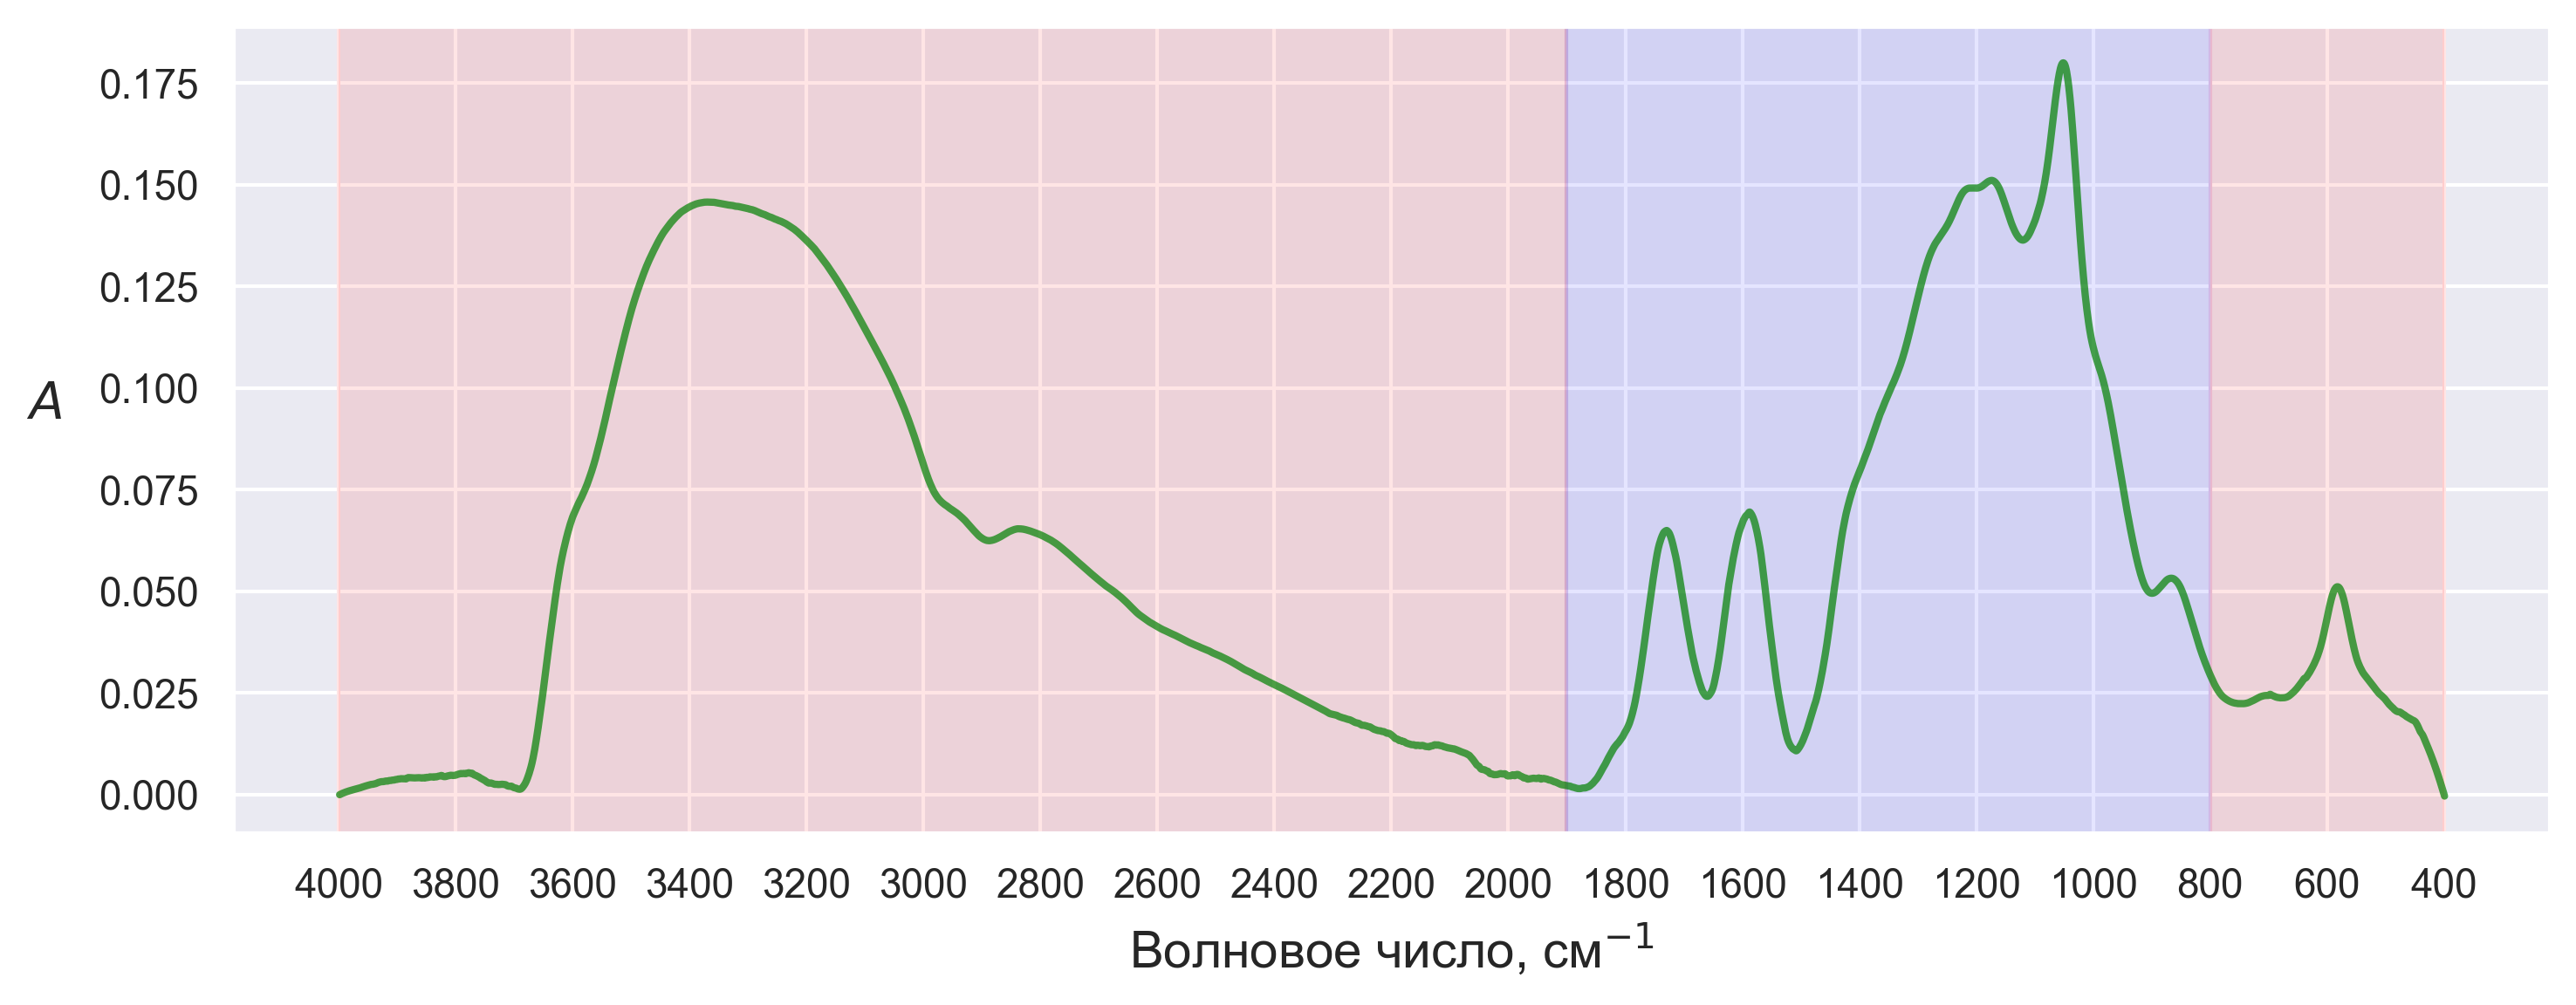

In [10]:
sns.set_theme()

fig = plt.figure(figsize=(10, 4), dpi=300)
ax = fig.gca()

# Smoothed spectrum
ax.plot(
    wavenumber,
    smoothed_spectrum,
    linewidth=2.0,
    color='green',
    alpha=0.7
)

ax.set_xlabel(
    'Волновое число, см$^{-1}$',
    fontstyle='normal',
    fontsize=14,
    labelpad=5
)

ax.set_ylabel(
    '$A$',
    fontstyle='italic',
    fontsize=14,
    labelpad=15,
    rotation=0
)

ax.invert_xaxis()

ax.xaxis.set_major_locator(ticker.MultipleLocator(200))

# Spectrum regions selection
ax.axvspan(xmin=4000, xmax=1900, color='red', linewidth=1.0, alpha=0.1)
ax.axvspan(xmin=1900, xmax=800, color='blue', linewidth=1.0, alpha=0.1)
ax.axvspan(xmin=800, xmax=400, color='red', linewidth=1.0, alpha=0.1)

plt.tight_layout()

plt.savefig(f'{path_to_save}/smoothed_spectrum_in_all_wavenumber_range.png', dpi=600)

plt.show()

## Smoothing

In [11]:
data_smoothed = initial_data.copy()

for idx in data_smoothed.index[1:]:
    data_smoothed.loc[idx] = savgol_filter(data_smoothed.loc[idx], window_length=63, polyorder=3)

data_smoothed.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141
wavenumber,1900.766600,1899.802230,1898.837870,1897.873500,1896.909130,1895.944770,1894.980400,1894.016030,1893.051670,1892.087300,1891.122930,1890.158570,1889.194200,1888.229830,1887.265470,1886.301100,1885.336730,1884.372370,1883.408000,1882.443640,1881.479270,1880.514900,1879.550540,1878.586170,1877.621800,...,823.569090,822.604720,821.640360,820.675990,819.711620,818.747260,817.782890,816.818520,815.854160,814.889790,813.925420,812.961060,811.996690,811.032320,810.067960,809.103590,808.139230,807.174860,806.210490,805.246130,804.281760,803.317390,802.353030,801.388660,800.424290
1,0.000184,0.000276,0.000361,0.000441,0.000515,0.000584,0.000649,0.000711,0.000771,0.000828,0.000885,0.000940,0.000996,0.001053,0.001111,0.001172,0.001235,0.001302,0.001373,0.001449,0.001531,0.001618,0.001713,0.001816,0.001927,...,0.007675,0.007307,0.006946,0.006594,0.006249,0.005914,0.005590,0.005275,0.004973,0.004682,0.004405,0.004142,0.003892,0.003658,0.003440,0.003239,0.003055,0.002889,0.002742,0.002615,0.002508,0.002422,0.002358,0.002317,0.002299
2,0.002548,0.002548,0.002548,0.002548,0.002547,0.002546,0.002545,0.002544,0.002543,0.002542,0.002540,0.002539,0.002538,0.002538,0.002537,0.002537,0.002537,0.002538,0.002539,0.002541,0.002543,0.002546,0.002549,0.002554,0.002559,...,0.006264,0.006206,0.006145,0.006079,0.006009,0.005935,0.005857,0.005774,0.005686,0.005593,0.005496,0.005394,0.005287,0.005174,0.005056,0.004933,0.004804,0.004670,0.004530,0.004384,0.004232,0.004074,0.003910,0.003739,0.003562


*Saving `data_smoothed` to .csv format*

In [12]:
data_smoothed.to_csv(f'{path_to_save_data}/ftir_smoothed.csv')

## Scaling to range [0...1]

In [13]:
data_scaled = initial_data.copy()

scaler = MinMaxScaler()

data_scaled.iloc[1:] = scaler.fit_transform(data_smoothed.iloc[1:, :].T).T

print(data_scaled.shape)
data_scaled.head(3)

(30, 1142)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141
wavenumber,1900.766600,1899.802230,1898.837870,1897.873500,1896.909130,1895.944770,1894.980400,1894.016030,1893.051670,1892.087300,1891.122930,1890.158570,1889.194200,1888.229830,1887.265470,1886.301100,1885.336730,1884.372370,1883.408000,1882.44364,1881.479270,1880.514900,1879.550540,1878.586170,1877.621800,...,823.569090,822.604720,821.640360,820.675990,819.711620,818.747260,817.782890,816.818520,815.854160,814.889790,813.925420,812.961060,811.996690,811.032320,810.067960,809.103590,808.139230,807.174860,806.210490,805.246130,804.281760,803.317390,802.353030,801.388660,800.424290
1,0.000494,0.000944,0.001362,0.001750,0.002112,0.002451,0.002770,0.003074,0.003364,0.003646,0.003921,0.004193,0.004467,0.004744,0.005028,0.005324,0.005633,0.005960,0.006308,0.00668,0.007079,0.007509,0.007974,0.008476,0.009019,...,0.037121,0.035323,0.033560,0.031835,0.030152,0.028514,0.026926,0.025390,0.023910,0.022491,0.021135,0.019846,0.018627,0.017483,0.016417,0.015433,0.014533,0.013723,0.013004,0.012382,0.011859,0.011440,0.011127,0.010924,0.010836
2,0.000210,0.000215,0.000213,0.000205,0.000192,0.000175,0.000155,0.000132,0.000109,0.000085,0.000063,0.000042,0.000025,0.000011,0.000003,0.000000,0.000004,0.000017,0.000039,0.00007,0.000113,0.000168,0.000236,0.000318,0.000415,...,0.072690,0.071565,0.070364,0.069083,0.067721,0.066275,0.064743,0.063123,0.061413,0.059610,0.057713,0.055719,0.053626,0.051432,0.049135,0.046732,0.044221,0.041600,0.038868,0.036021,0.033058,0.029976,0.026773,0.023447,0.019997


*Saving `data_scaled` to .csv format*

In [14]:
data_scaled.to_csv(f'{path_to_save_data}/ftir_scaled.csv')

## Visualization of initial spectrum and their preprocessed version for comparison

In [15]:
wavenumber = initial_data.loc['wavenumber']

spectrum_id = '3'
initial_spectrum = initial_data.loc[spectrum_id]
smoothed_spectrum = data_smoothed.loc[spectrum_id]
scaled_spectrum = data_scaled.loc[spectrum_id]

print(
    f'Число точек',
    f'(*) Исходный спектр: {len(initial_spectrum)}',
    f'(*) Сглаженный спектр: {len(smoothed_spectrum)}',
    f'(*) Нормализованный спектр: {len(scaled_spectrum)}',
    sep='\n'
)

Число точек
(*) Исходный спектр: 1142
(*) Сглаженный спектр: 1142
(*) Нормализованный спектр: 1142


### *Initial* vs *Smoothed*

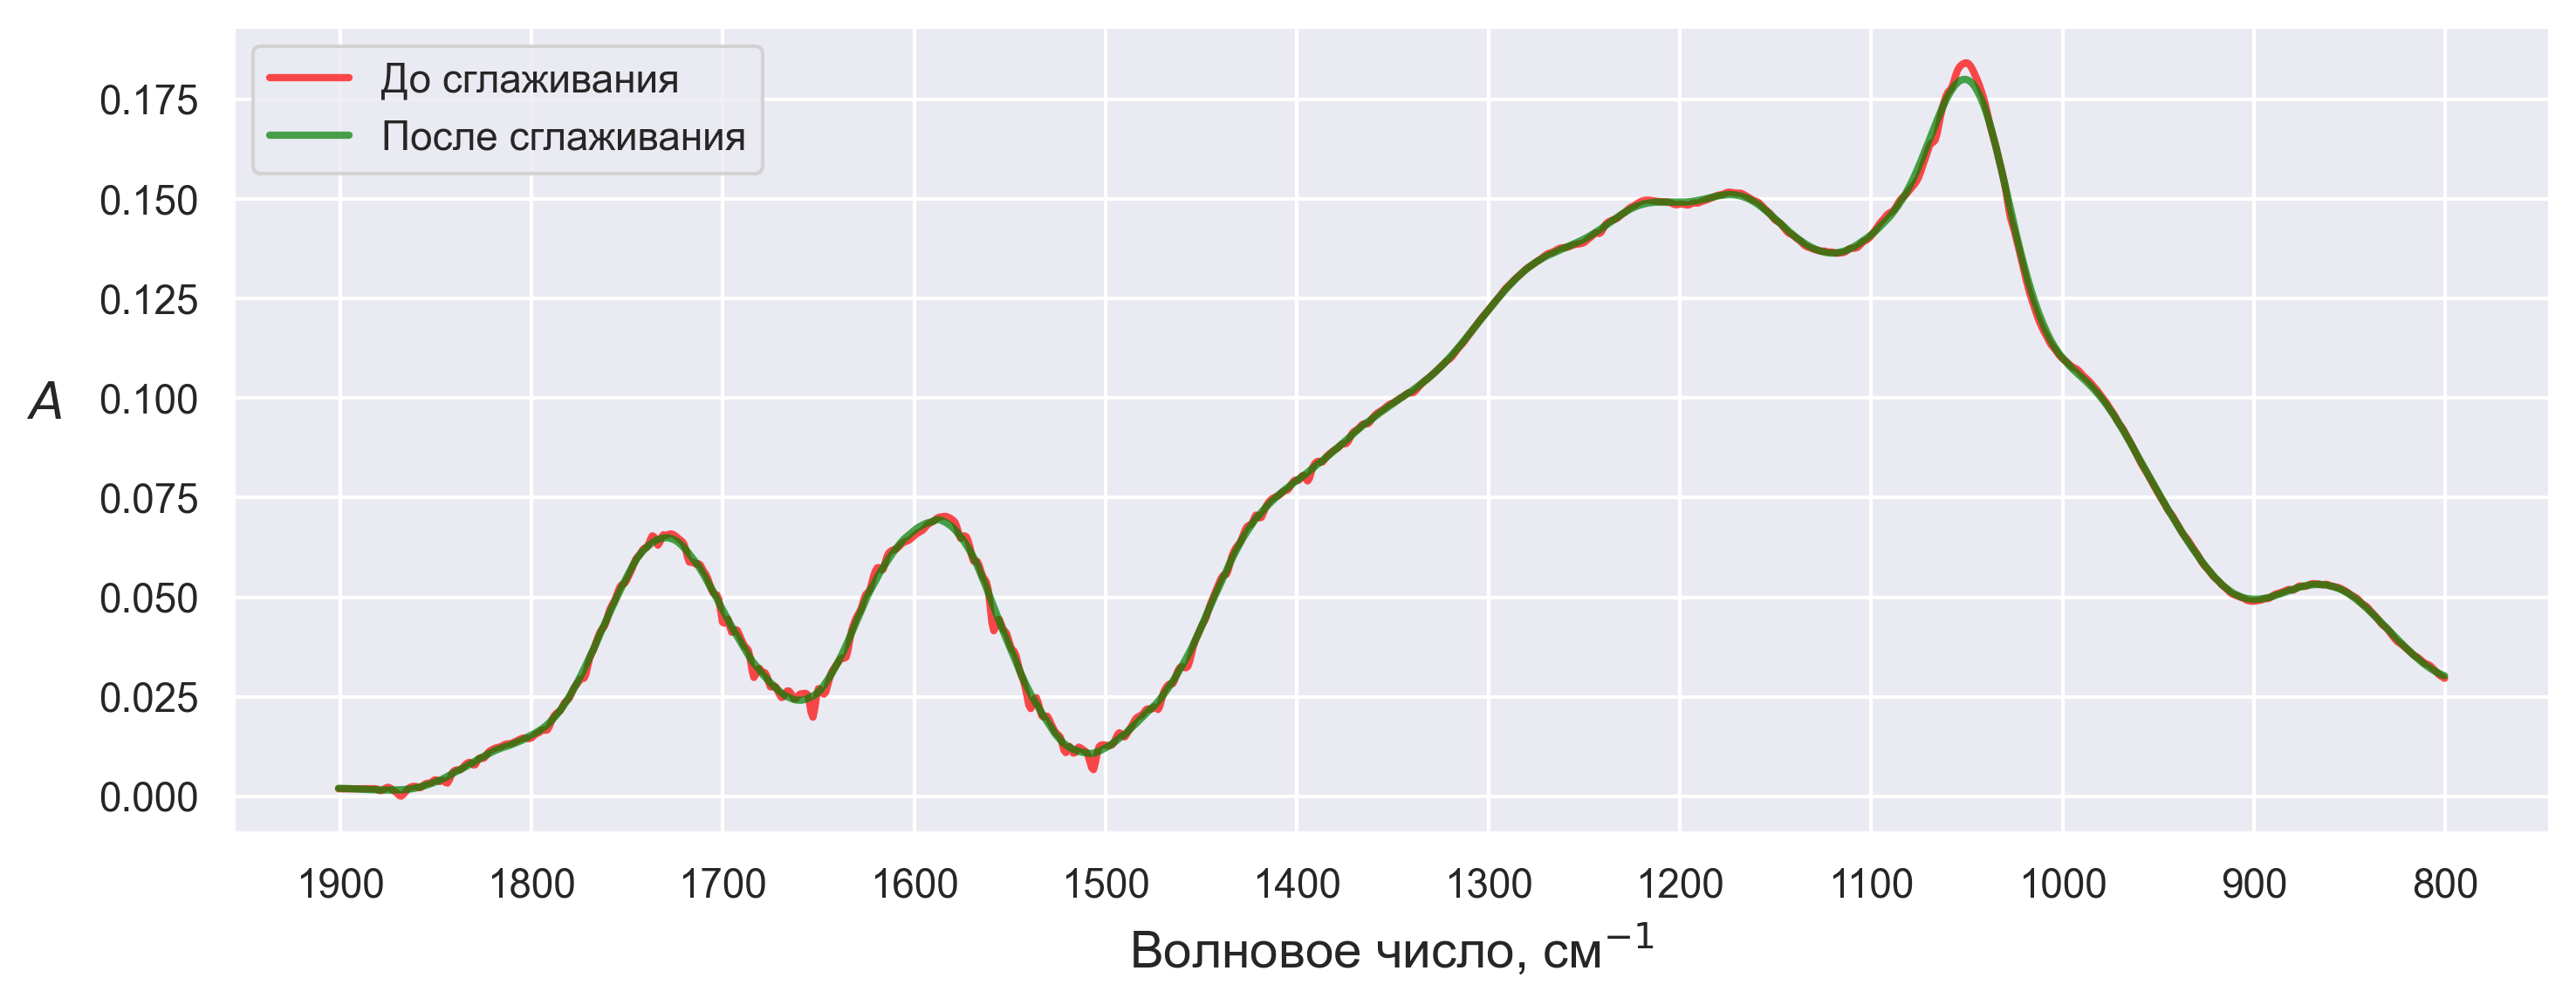

In [16]:
sns.set_theme()

fig = plt.figure(figsize=(10, 4), dpi=300)
ax = fig.gca()

# Initial spectrum
ax.plot(
    wavenumber,
    initial_spectrum,
    linewidth=2.0,
    color='red',
    alpha=0.7,
    label='До сглаживания'
)

# Smoothed spectrum
ax.plot(
    wavenumber,
    smoothed_spectrum,
    linewidth=2.0,
    color='green',
    alpha=0.7,
    label='После сглаживания'
)

ax.set_xlabel(
    'Волновое число, см$^{-1}$',
    fontstyle='normal',
    fontsize=14,
    labelpad=5
)

ax.set_ylabel(
    '$A$',
    fontstyle='italic',
    fontsize=14,
    labelpad=15,
    rotation=0
)

ax.invert_xaxis()

ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

ax.legend(loc='upper left')

plt.tight_layout()

plt.savefig(f'{path_to_save}/initial_and_smoothed_spectrum.png', dpi=600)

plt.show()

### *Smoothed* vs *Scaled*

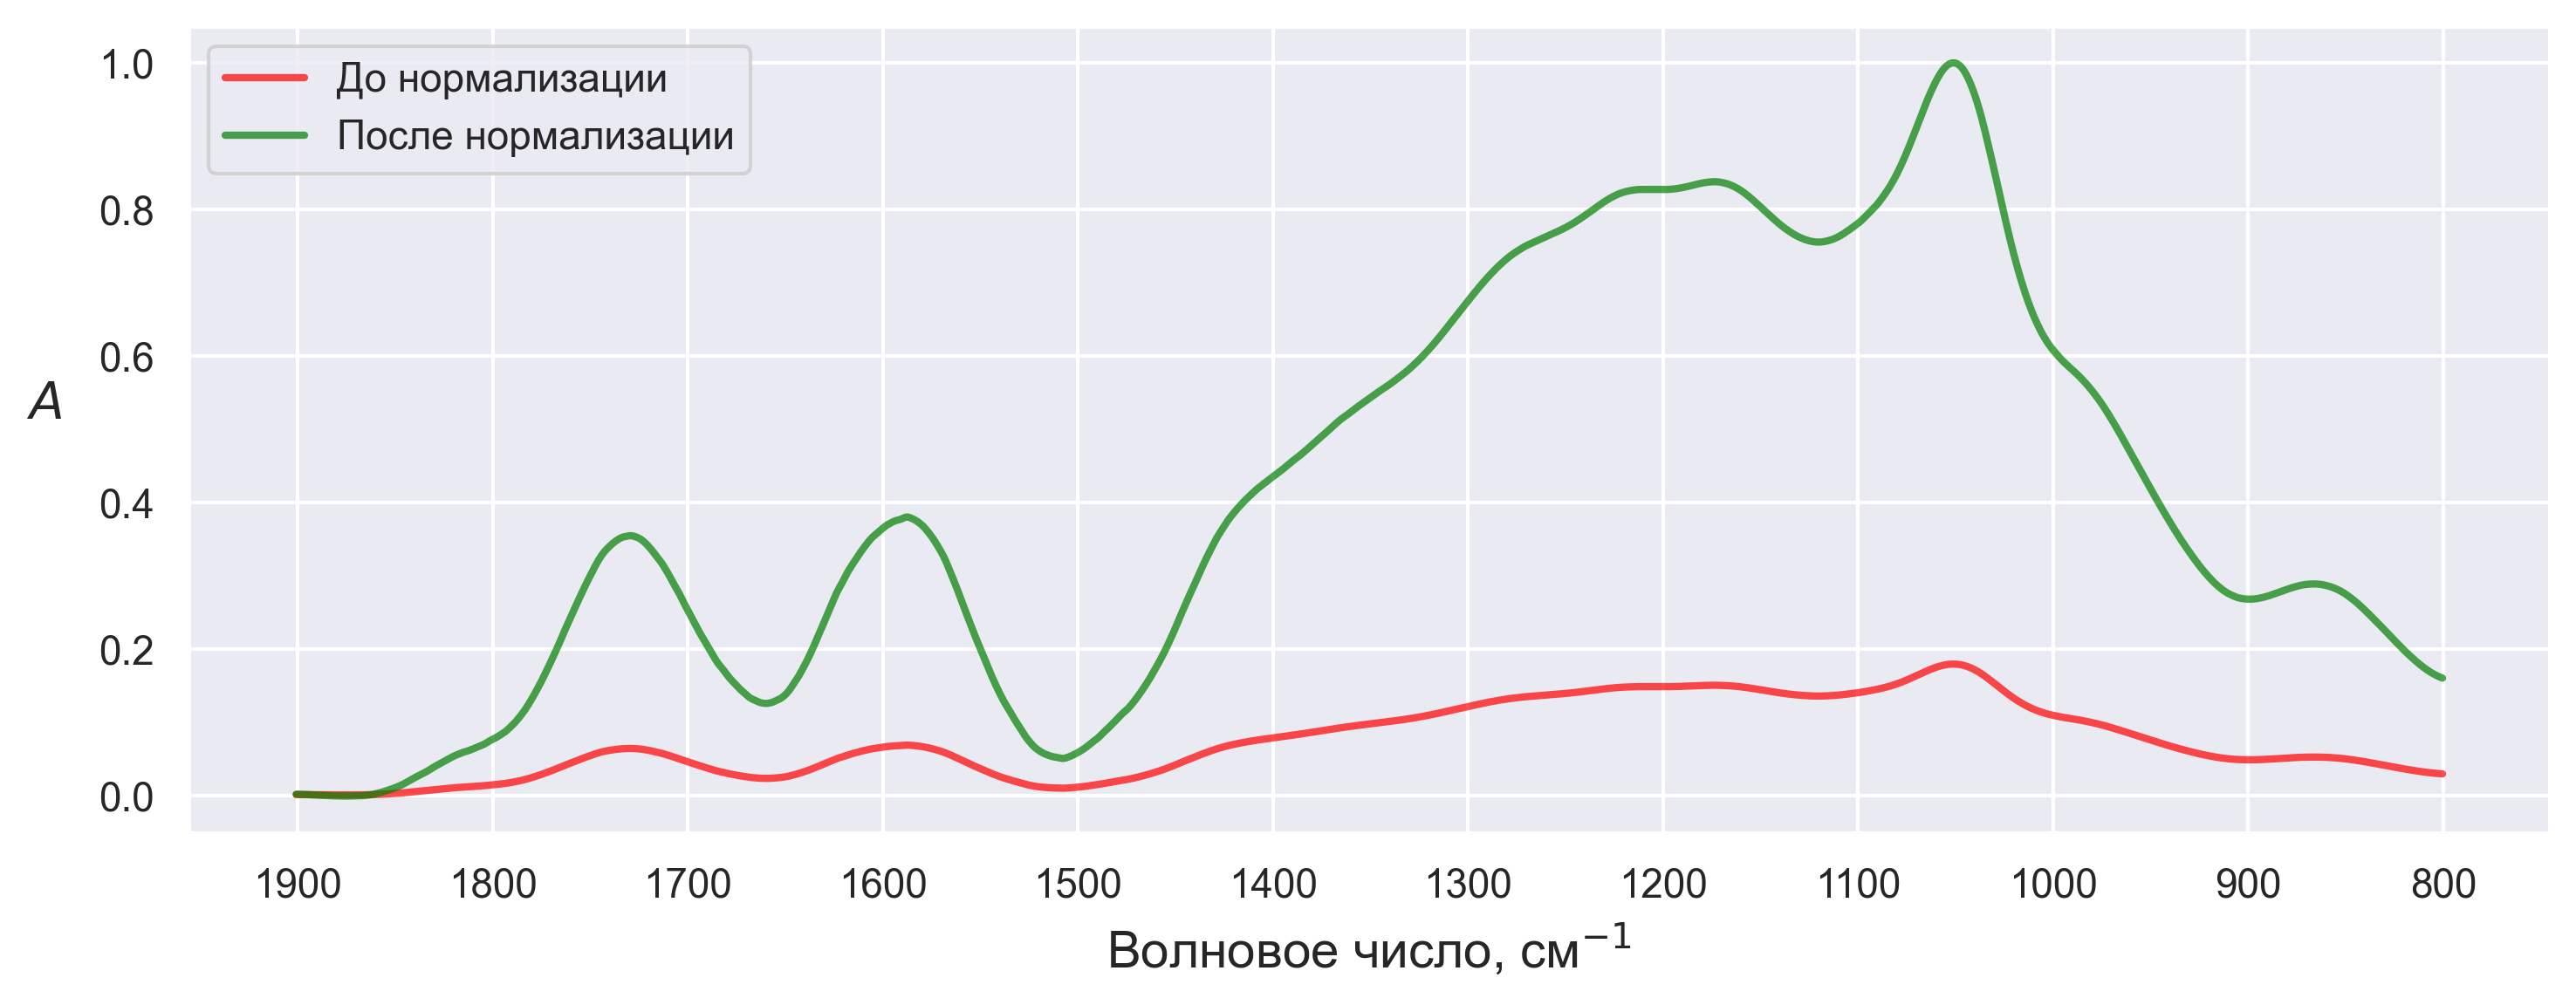

In [17]:
sns.set_theme()

fig = plt.figure(figsize=(10, 4), dpi=300)
ax = fig.gca()

# Smoothed spectrum
ax.plot(
    wavenumber,
    smoothed_spectrum,
    linewidth=2.0,
    color='red',
    alpha=0.7,
    label='До нормализации'
)

# Scaled spectrum
ax.plot(
    wavenumber,
    scaled_spectrum,
    linewidth=2.0,
    color='green',
    alpha=0.7,
    label='После нормализации'
)

ax.set_xlabel(
    'Волновое число, см$^{-1}$',
    fontstyle='normal',
    fontsize=14,
    labelpad=5
)

ax.set_ylabel(
    '$A$',
    fontstyle='italic',
    fontsize=14,
    labelpad=15,
    rotation=0
)

ax.invert_xaxis()

ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

ax.legend(loc='upper left')

plt.tight_layout()

plt.savefig(f'{path_to_save}/smoothed_and_scaled_spectrum.png', dpi=600)

plt.show()

## Add samples description, labels *Train/Test*

In [18]:
sample_description_dict = {
    1: {
        'Description': 'MFGO, разб. 1:20',
        'Type': '$GO$'
    },
    2: {
        'Description': 'HGO, 0.0116 г в 25 мл H2O',
        'Type': '$GO$'
    },
    3: {
        'Description': 'GO, RusGraphene, 2 г в 1000 мл H2O',
        'Type': '$GO$'
    },
    6: {
        'Description': 'rGO, RusGraphene, 2 г в 1000 мл H2O',
        'Type': '$rGO$'
    },
    8: {
        'Description': 'GO, RusGraphene, 2 г в 1000 мл H2O',
        'Type': '$GO$'
    },
    9: {
        'Description': 'GO, RusGraphene, 1.00 г в 250 мл H2O',
        'Type': '$GO$'
    },
    10: {
        'Description': 'rGO, RusGraphene, 0.20 г в 100 мл H2O',
        'Type': '$rGO$'
    },
    11: {
        'Description': 'GO, RusGraphene, 1.00 г в 250 мл H2O',
        'Type': '$GO$'
    },
    12: {
        'Description': 'GO, USA, 0.1 г в 100 мл H2O',
        'Type': '$GO$'
    },
    13: {
        'Description': 'GO, RusGraphene, 2 г в 1000 мл H2O',
        'Type': '$GO$'
    },
    17: {
        'Description': 'Образец 8 после диализа 7 дней, H2O, стакан 1 л, замена воды каждые 2 дня',
        'Type': '$GO_{d}$'
    },
    18: {
        'Description': 'Образец 8 после диализа 7 дней, H2O, стакан 1 л, замена воды каждые 2 дня',
        'Type': '$GO_{d}$'
    },
    19: {
        'Description': 'Образец 8 после диализа 3.5 кДа, конд. 7 дней в H2O',
        'Type': '$GO_{d}$'
    },
    20: {
        'Description': 'Образец 8 после диализа 3.5 кДа, конд. 7 дней в ЭДТА 0.05 М',
        'Type': '$GO_{d}$'
    },
    21: {
        'Description': 'Образец 10 после диализа 3.5 кДа, конд.',
        'Type': '$rGO$'
    },
    22: {
        'Description': 'Образец 8 после диализа 3.5 кДа, конд. 7 дней в ЭДТА 0.05 М (повторное использование)',
        'Type': '$GO_{d}$'
    },
    23: {
        'Description': 'Образец 9 после диализа 14 кДа, конд. 7 дней в ЭДТА 0.05М',
        'Type': '$GO_{d}$'
    },
    24: {
        'Description': 'Образец 9 после диализа 14 кДа 75 мм, конд. 7 дней в ЭДТА 0.05М',
        'Type': '$GO_{d}$'
    },
    25: {
        'Description': 'Образец 9 после диализа 14 кДа 75 мм, конд. 7 дней в ЭДТА 0.05М (повторное использование)',
        'Type': '$GO_{d}$'
    },
    26: {
        'Description': 'Образец 11 после диализа 2 дня, H2O, 1 кДа',
        'Type': '$GO_{d}$'
    },
    27: {
        'Description': 'Образец 11 после диализа 5 дней, H2O, 14 кДа 75 мм',
        'Type': '$GO_{d}$'
    },
    28: {
        'Description': 'Образец 9 после диализа при 25°С 14 кДа, конд. 7 дней в ЭДТА 0.05М',
        'Type': '$GO_{d}$'
    },
    29: {
        'Description': 'Образец 9 после диализа при 45°С 14 кДа, конд. 7 дней в ЭДТА 0.05М',
        'Type': '$GO_{d}$'
    },
    30: {
        'Description': 'Образец 13 после диализа 0.5 кДа, конд. 7 дней в ЭДТА 0.05М',
        'Type': '$GO_{d}$'
    },
    31: {
        'Description': 'Образец 30 после диализа 12 дней, 14 кДа, конд. 7 дней в ЭДТА 0.05М',
        'Type': '$GO_{d}$'
    },
    33: {
        'Description': 'GO, RusGraphene',
        'Type': '$GO$'
    },
    34: {
        'Description': 'Образец GO после диализа (1/2)',
        'Type': '$GO_{d}$'
    },
    35: {
        'Description': 'Образец GO после диализа, RusGraphene',
        'Type': '$GO_{d}$'
    },
    36: {
        'Description': 'rGO, RusGraphene',
        'Type': '$rGO$'
    }
}

In [19]:
samples_description = pd.DataFrame(sample_description_dict).T

samples_description.index = samples_description.index.astype(str)

print(samples_description.shape)
samples_description.head(3)

(29, 2)


,Description,Type
1,"MFGO, разб. 1:20",$GO$
2,"HGO, 0.0116 г в 25 мл H2O",$GO$
3,"GO, RusGraphene, 2 г в 1000 мл H2O",$GO$


*Create column `Class`*

In [20]:
def convert_type_to_class(x):
    if x == '$rGO$':
        class_value = 0
    elif x == '$GO$':
        class_value = 1
    elif x == '$GO_{d}$':
        class_value = 2
    return class_value

samples_description['Class'] = samples_description['Type'].apply(lambda x: convert_type_to_class(x))

print(samples_description.shape)
samples_description.head(3)

(29, 3)


,Description,Type,Class
1,"MFGO, разб. 1:20",$GO$,1
2,"HGO, 0.0116 г в 25 мл H2O",$GO$,1
3,"GO, RusGraphene, 2 г в 1000 мл H2O",$GO$,1


*Create column `Label` as an array with 'Train', 'Test' values*

In [21]:
samples_description['Label'] = ['Train' if int(idx) <= 31 else 'Test' for idx in samples_description.index]

print(samples_description.shape)
samples_description.head(3)

(29, 4)


,Description,Type,Class,Label
1,"MFGO, разб. 1:20",$GO$,1,Train
2,"HGO, 0.0116 г в 25 мл H2O",$GO$,1,Train
3,"GO, RusGraphene, 2 г в 1000 мл H2O",$GO$,1,Train


*Checking the correctness of transformations*

In [22]:
columns_to_be_checked = ['Type', 'Class', 'Label']

for column in columns_to_be_checked:
    display(pd.DataFrame(samples_description[column].value_counts()).T)

Type,$GO_{d}$,$GO$,$rGO$
count,16,9,4


Class,2,1,0
count,16,9,4


Label,Train,Test
count,25,4


In [23]:
samples_description.to_csv(f'{path_to_save_data}/ftir_description.csv', index=True)

## Splitting data to Train/Test and saving

In [24]:
train_idx_lst = samples_description.loc[samples_description['Label'] == 'Train'].index.tolist()
test_idx_lst = samples_description.loc[samples_description['Label'] == 'Test'].index.tolist()

print(
    f"Число наблюдений в Train выборке: {len(train_idx_lst)}",
    f"Число наблюдений в Test выборке: {len(test_idx_lst)}",
    sep="\n"
)

Число наблюдений в Train выборке: 25
Число наблюдений в Test выборке: 4


In [25]:
data_scaled_train = data_scaled.loc[['wavenumber'] + train_idx_lst]

print(data_scaled_train.shape)
data_scaled_train.head(3)

(26, 1142)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141
wavenumber,1900.766600,1899.802230,1898.837870,1897.873500,1896.909130,1895.944770,1894.980400,1894.016030,1893.051670,1892.087300,1891.122930,1890.158570,1889.194200,1888.229830,1887.265470,1886.301100,1885.336730,1884.372370,1883.408000,1882.44364,1881.479270,1880.514900,1879.550540,1878.586170,1877.621800,...,823.569090,822.604720,821.640360,820.675990,819.711620,818.747260,817.782890,816.818520,815.854160,814.889790,813.925420,812.961060,811.996690,811.032320,810.067960,809.103590,808.139230,807.174860,806.210490,805.246130,804.281760,803.317390,802.353030,801.388660,800.424290
1,0.000494,0.000944,0.001362,0.001750,0.002112,0.002451,0.002770,0.003074,0.003364,0.003646,0.003921,0.004193,0.004467,0.004744,0.005028,0.005324,0.005633,0.005960,0.006308,0.00668,0.007079,0.007509,0.007974,0.008476,0.009019,...,0.037121,0.035323,0.033560,0.031835,0.030152,0.028514,0.026926,0.025390,0.023910,0.022491,0.021135,0.019846,0.018627,0.017483,0.016417,0.015433,0.014533,0.013723,0.013004,0.012382,0.011859,0.011440,0.011127,0.010924,0.010836
2,0.000210,0.000215,0.000213,0.000205,0.000192,0.000175,0.000155,0.000132,0.000109,0.000085,0.000063,0.000042,0.000025,0.000011,0.000003,0.000000,0.000004,0.000017,0.000039,0.00007,0.000113,0.000168,0.000236,0.000318,0.000415,...,0.072690,0.071565,0.070364,0.069083,0.067721,0.066275,0.064743,0.063123,0.061413,0.059610,0.057713,0.055719,0.053626,0.051432,0.049135,0.046732,0.044221,0.041600,0.038868,0.036021,0.033058,0.029976,0.026773,0.023447,0.019997


In [26]:
data_scaled_test = data_scaled.loc[['wavenumber'] + test_idx_lst]

print(data_scaled_test.shape)
data_scaled_test.head(3)

(5, 1142)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141
wavenumber,1900.766600,1899.802230,1898.837870,1897.873500,1896.909130,1895.944770,1894.980400,1894.016030,1893.051670,1892.087300,1891.122930,1890.158570,1889.194200,1888.229830,1887.265470,1886.301100,1885.336730,1884.372370,1883.408000,1882.443640,1881.479270,1880.514900,1879.550540,1878.586170,1877.621800,...,823.569090,822.604720,821.640360,820.675990,819.711620,818.747260,817.782890,816.818520,815.85416,814.889790,813.925420,812.961060,811.996690,811.032320,810.067960,809.103590,808.139230,807.174860,806.210490,805.246130,804.281760,803.317390,802.353030,801.388660,800.424290
33,0.000000,0.000113,0.000214,0.000303,0.000382,0.000452,0.000513,0.000569,0.000619,0.000665,0.000708,0.000749,0.000791,0.000833,0.000878,0.000926,0.000979,0.001037,0.001104,0.001178,0.001263,0.001358,0.001466,0.001587,0.001723,...,0.236989,0.235353,0.233715,0.232077,0.230442,0.228811,0.227187,0.225573,0.22397,0.222381,0.220809,0.219256,0.217723,0.216214,0.214731,0.213276,0.211852,0.210460,0.209103,0.207784,0.206505,0.205267,0.204075,0.202929,0.201832
34,0.000499,0.000411,0.000331,0.000258,0.000193,0.000137,0.000090,0.000052,0.000024,0.000007,0.000000,0.000005,0.000021,0.000050,0.000091,0.000145,0.000213,0.000295,0.000392,0.000503,0.000629,0.000772,0.000931,0.001106,0.001298,...,0.191026,0.190466,0.189875,0.189253,0.188599,0.187913,0.187195,0.186444,0.18566,0.184842,0.183991,0.183105,0.182184,0.181229,0.180238,0.179212,0.178149,0.177049,0.175913,0.174740,0.173529,0.172279,0.170992,0.169666,0.168300


In [27]:
data_scaled_train.to_csv(f'{path_to_save_data}/ftir_scaled_train.csv')

In [28]:
data_scaled_test.to_csv(f'{path_to_save_data}/ftir_scaled_test.csv')